# Import Libraries and load dataset

In [9]:
import re, string, unicodedata                          # Import Regex, string and unicodedata.
import contractions                                     # Import contractions library.
from bs4 import BeautifulSoup                           # Import BeautifulSoup.

import numpy as np                                      # Import numpy.
import pandas as pd                                     # Import pandas.
import nltk                                             # Import Natural Language Tool-Kit.

nltk.download('stopwords')                              # Download Stopwords.
nltk.download('punkt')
nltk.download('wordnet')

from nltk.corpus import stopwords                       # Import stopwords.
from nltk.tokenize import word_tokenize, sent_tokenize  # Import Tokenizer.
from nltk.stem.wordnet import WordNetLemmatizer         # Import Libraries and load dataset

import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dude\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dude\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\dude\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [10]:
data = pd.read_csv("Tweets.csv")

In [11]:
data.shape

(14640, 15)

In [12]:
data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [13]:
data.isnull().sum(axis=0)  

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

In [14]:
data = data.loc[:,['airline_sentiment', 'text']]

In [15]:
pd.set_option('display.max_colwidth', None)

data.head(5) 

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials to the experience... tacky.
2,neutral,@VirginAmerica I didn't today... Must mean I need to take another trip!
3,negative,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse"
4,negative,@VirginAmerica and it's a really big bad thing about it


In [16]:
data['airline_sentiment'].unique()

array(['neutral', 'positive', 'negative'], dtype=object)

In [17]:
# replacing the values in the target column

data['airline_sentiment'].replace({'neutral':1, 'positive':2, 'negative':3 }, inplace = True)

In [18]:
data.head(5)

,airline_sentiment,text
0,1,@VirginAmerica What @dhepburn said.
1,2,@VirginAmerica plus you've added commercials to the experience... tacky.
2,1,@VirginAmerica I didn't today... Must mean I need to take another trip!
3,3,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse"
4,3,@VirginAmerica and it's a really big bad thing about it


# Pre-processing 1
## remove html, contractions, tokenize & prepare stopwords

In [19]:
#remove html tags

def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()
    

data['text'] = data['text'].apply(lambda x: strip_html(x)) 

In [20]:
# remove contractions 've, 'm, 'd etc

def replace_contractions(words):
    return contractions.fix(words)

data['text'] = data['text'].apply(lambda x: replace_contractions(x))

In [21]:
# cvery important step: remove the @word, http, https, numbers

def remove_numbers(text):
  text = re.sub(r'\d+|(?:\@|http?\:|https?\:|www)\S+', '', text)
  return text

data['text'] = data['text'].apply(lambda x: remove_numbers(x))
data.head()

,airline_sentiment,text
0,1,What said.
1,2,plus you have added commercials to the experience... tacky.
2,1,I did not today... Must mean I need to take another trip!
3,3,"it is really aggressive to blast obnoxious ""entertainment"" in your guests' faces & they have little recourse"
4,3,and it is a really big bad thing about it


In [22]:
# Tokenize the words

for i, row in data.iterrows():
    text = data.at[i, 'text']
    words = nltk.word_tokenize(text)
    data.at[i,'text'] = words
data.head(5)

,airline_sentiment,text
0,1,"[What, said, .]"
1,2,"[plus, you, have, added, commercials, to, the, experience, ..., tacky, .]"
2,1,"[I, did, not, today, ..., Must, mean, I, need, to, take, another, trip, !]"
3,3,"[it, is, really, aggressive, to, blast, obnoxious, ``, entertainment, '', in, your, guests, ', faces, &, they, have, little, recourse]"
4,3,"[and, it, is, a, really, big, bad, thing, about, it]"


In [23]:
# Append stopwords with frequent words

stopwords = stopwords.words('english')

customlist_remove = ['not', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn',"hasn't", 'haven', 
                     "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', 
                     "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]

stopwords = list(set(stopwords) - set(customlist_remove)) #removing these from stopwords

In [24]:
stopwords

['very',
 'm',
 'having',
 'your',
 'we',
 'when',
 'few',
 'some',
 'up',
 'it',
 're',
 's',
 'was',
 'aren',
 'my',
 'again',
 'their',
 "aren't",
 'on',
 'the',
 'such',
 "you'll",
 'him',
 't',
 'y',
 'who',
 'during',
 'above',
 'himself',
 'no',
 'nor',
 'just',
 "it's",
 'can',
 'now',
 'doing',
 'themselves',
 'ain',
 'any',
 'did',
 'am',
 'are',
 'has',
 'but',
 'they',
 'into',
 'herself',
 'yours',
 'should',
 'you',
 'hers',
 'were',
 'with',
 'ours',
 'had',
 'be',
 'll',
 'and',
 "she's",
 'this',
 'will',
 'don',
 'o',
 'have',
 'down',
 'while',
 'than',
 'at',
 'its',
 'them',
 'if',
 'until',
 'own',
 'too',
 'couldn',
 'those',
 'under',
 'once',
 'same',
 'through',
 'an',
 'out',
 'yourself',
 'been',
 'all',
 'she',
 'in',
 'd',
 'whom',
 'between',
 'our',
 'he',
 'below',
 'what',
 'where',
 'do',
 'other',
 'these',
 "that'll",
 "you've",
 'i',
 'here',
 'to',
 'there',
 "should've",
 "you'd",
 'before',
 'each',
 'so',
 'a',
 'how',
 'off',
 'ourselves',
 'a

## remove punctuation, change to lowercase, lemmatize, remove stopwords

In [25]:
def remove_punctuation(words):                   # remove special characters and numbers
    new_words = []
    for word in words:
        new_word = re.sub(r'[^A-Za-z]+', '', word)  # [0-9]|^\w\s|
        if new_word != '':
            new_words.append(new_word)
    return new_words

def to_lowercase(words):                         # conversion to lowercase
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

lemmatizer = WordNetLemmatizer()
def lemmatize_list(words):                       # lemmatize list
    new_words = []
    for word in words:
      new_words.append(lemmatizer.lemmatize(word, pos='v'))
    return new_words

def remove_stopwords(words):                    # remove stopwords
    new_words = []
    for word in words:
        if word not in stopwords:
            new_words.append(word)
    return new_words

# stopwords_manual = ['VirginAmerica', 'unite']

# def remove_stopwords_manual(words):                    # remove stopwords_manual
#     new_words = []
#     for word in words:
#         if word not in stopwords_manual:
#             new_words.append(word)
#     return new_words

def normalize(words):
    words = to_lowercase(words)
    words = remove_punctuation(words)
    words = remove_stopwords(words)
    words = remove_stopwords_manual(words)
    words = lemmatize_list(words)
    return ' '.join(words)

In [26]:
data['text'] = data.apply(lambda row: normalize(row['text']), axis=1)

In [59]:
data.head(5)

,airline_sentiment,text
0,1,say
1,2,plus add commercials experience tacky
2,1,not today must mean need take another trip
3,3,really aggressive blast obnoxious entertainment guests face little recourse
4,3,really big bad thing


## list of words to feed it back to stopwords

In [28]:
#  data.to_csv('check_words.csv') # check data in Excel

In [29]:
# list of all words (unique)

# all_words = set()
# data['text'].str.split().apply(all_words.update)
# print(all_words)

In [30]:
# text = " ".join(review for review in data['text'])
# print ("There are {} words in the combination of all review.".format(len(text)))

In [31]:
# # visual check of th most frequent words

# # !pip install wordcloud
# from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# wordcloud = WordCloud().generate(text)
    
# plt.figure(1,figsize = (13,13))
# plt.imshow(wordcloud)
# plt.axis('off')
# plt.show()
                              
# # wordcloud_draw(all_words, 'white')

In [32]:
# len(all_words)

In [33]:
# numerical check of the numbers

import itertools
from collections import Counter              # counting the words

result_not_arranged = Counter(" ".join(data['text'].values.tolist()).split(" ")).items()

result_arranged = list(itertools.chain(result_not_arranged))

def Sort_Tuple(tup):
    return(sorted(tup, key = lambda x: x[1], reverse = True))  

word_count = Sort_Tuple(result_arranged)
print("number of unique words: ", len(word_count))
word_count

number of unique words:  10027


[('flight', 4836),
 ('not', 3902),
 ('get', 2120),
 ('thank', 1686),
 ('cancel', 1056),
 ('service', 996),
 ('delay', 991),
 ('time', 954),
 ('help', 951),
 ('go', 798),
 ('call', 778),
 ('fly', 776),
 ('bag', 768),
 ('wait', 752),
 ('customer', 751),
 ('us', 745),
 ('would', 739),
 ('hold', 715),
 ('make', 693),
 ('need', 686),
 ('hours', 681),
 ('plane', 631),
 ('try', 586),
 ('still', 580),
 ('please', 570),
 ('one', 563),
 ('gate', 542),
 ('back', 528),
 ('seat', 515),
 ('take', 512),
 ('say', 508),
 ('flightled', 506),
 ('book', 502),
 ('tell', 492),
 ('hour', 480),
 ('change', 462),
 ('phone', 454),
 ('know', 442),
 ('check', 438),
 ('like', 434),
 ('today', 426),
 ('late', 426),
 ('guy', 424),
 ('work', 409),
 ('miss', 407),
 ('airline', 401),
 ('ticket', 399),
 ('leave', 380),
 ('give', 372),
 ('could', 357),
 ('board', 351),
 ('want', 348),
 ('way', 348),
 ('airport', 344),
 ('day', 336),
 ('great', 335),
 ('sit', 334),
 ('travel', 328),
 ('lose', 327),
 ('even', 325),
 ('send

# Vectorization

In [34]:
# Target field determined

labels = data['airline_sentiment']
labels = labels.astype('int')

### CountVectorizer

In [35]:
from sklearn.feature_extraction.text import CountVectorizer

countvectors = CountVectorizer(max_features=len(word_count))    # set max number of words (now features)

data_features_cvec = countvectors.fit_transform(data['text'])

data_features_cvec = data_features_cvec.toarray()                        # Convert the data features to array.

In [36]:
data_features_cvec.shape

(14640, 10009)

In [37]:
# Split data into training and testing set.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_features_cvec, labels, test_size=0.3, random_state=42)

In [46]:
# Using Random Forest to build model for the classification of reviews.
# Also calculating the cross validation score.

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

forest = RandomForestClassifier(n_estimators=50, n_jobs=4)

forest = forest.fit(X_train, y_train)

print(forest)

print(np.mean(cross_val_score(forest, data_features_cvec, labels, cv=10)))

RandomForestClassifier(n_estimators=50, n_jobs=4)
0.7575819672131148


In [47]:
# Predict the result for test data using the model built above.

result = forest.predict(X_test)

[[ 433   60  391]
 [  84  395  215]
 [ 165   43 2606]]


<AxesSubplot:>

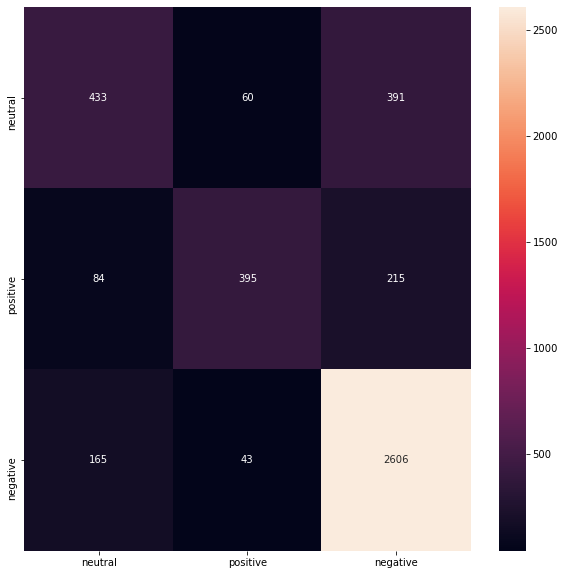

In [48]:
# Print and plot Confusion matirx to get an idea of how the distribution of the prediction is, among all the classes.

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, result)

print(conf_mat)

df_cm = pd.DataFrame(conf_mat, index = [i for i in ['neutral', 'positive', 'negative']],
                  columns = [i for i in ['neutral', 'positive', 'negative']])
plt.figure(figsize = (10,10))
sns.heatmap(df_cm, annot=True, fmt='g')

### TfidVectorizer

In [49]:
from sklearn.feature_extraction.text import TfidfVectorizer

Tfidvectors = TfidfVectorizer(max_features = len(word_count))

data_features_tfiv = Tfidvectors.fit_transform(data['text'])

data_features_tfiv = data_features_tfiv.toarray()

data_features_tfiv.shape

(14640, 10009)

In [50]:
X_train, X_test, y_train, y_test = train_test_split(data_features_tfiv, labels, test_size=0.3, random_state=42)

In [51]:
# Using Random Forest to build model for the classification of reviews.
# Also calculating the cross validation score.

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

import numpy as np

forest = RandomForestClassifier(n_estimators=50, n_jobs=4)

forest = forest.fit(X_train, y_train)

print(forest)

print(np.mean(cross_val_score(forest, data_features_tfiv, labels, cv=10)))

RandomForestClassifier(n_estimators=50, n_jobs=4)
0.7607923497267759


In [52]:
result = forest.predict(X_test)

[[ 428   57  399]
 [  70  405  219]
 [ 160   45 2609]]


<AxesSubplot:>

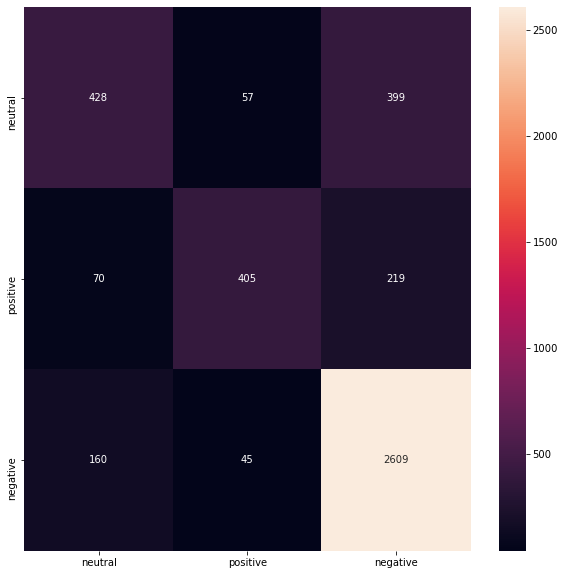

In [53]:
conf_mat = confusion_matrix(y_test, result)

print(conf_mat)

df_cm = pd.DataFrame(conf_mat, index = [i for i in ['neutral', 'positive', 'negative']],
                  columns = [i for i in ['neutral', 'positive', 'negative']])
plt.figure(figsize = (10,10))
sns.heatmap(df_cm, annot=True, fmt='g')

## Summary:

- We used dataset which has tweets in text format and their sentiment scores: ['neutral': 1, 'positive': 2, 'negative': 3] .
- The goal was to build a model for text-classification.
- Pre-processed the data using variuos techniques and libraries.
- The pre-precessed data is converted to numbers, so that we can feed the data in the model: during the preprocessing the data needed removal of Twitter hashtags (as they don't affect the calssification), URL links, numbers, special characters. stop-words, and the text needed to be lower cased)
- After building the classification model, the result for the test data was predicted.
- After that we saw that using the above techniques, our model performed good in perspective of how the text classification models perform.
- Upon using 5000 features the models already perform for CountVectorizer and TfIdVectorizer at 67% and 74% accuracy respectively. byt maximising the number of features and increasing the number of estimators, it is around 75% and 76% respectively.
- However, we can still increase the accuracy of our model by increasing the number of features, ie. the number of words.
- Another way to increase accuracy is to use different variations of Pre-processing techniques, like Word2vec.